**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [41]:
# Write your code here
import numpy as np
from types import SimpleNamespace
from Examproject import ProductionEconomy
model = ProductionEconomy

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [42]:
# Write your code here
import numpy as np
from types import SimpleNamespace
from Examproject import ProductionEconomy

# Initialize parameters
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Initialize the economy with parameters
model = ProductionEconomy(A=par.A, gamma=par.gamma, alpha=par.alpha, nu=par.nu, epsilon=par.epsilon)

# Setting parameters
w = 1  # Wage (numeraire)

# Function to check market clearing
def check_market_clearing(model, p1_values, p2_values, w, tau, T):
    results = []
    for p1 in p1_values:
        for p2 in p2_values:
            ell_opt = model.consumer_optimal_labor(p1, p2, w, tau, T)
            c1, c2, income = model.consumer_budget(p1, p2, w, tau, T, ell_opt)
            y1 = model.firm_output(w, p1)
            y2 = model.firm_output(w, p2)
            labor_demand_total = model.firm_labor_demand(w, p1) + model.firm_labor_demand(w, p2)
            labor_market_clear = np.isclose(ell_opt, labor_demand_total)
            goods_market_clear = np.isclose(c1, y1) and np.isclose(c2, y2)
            results.append((p1, p2, labor_market_clear, goods_market_clear))
    return results

# Define the ranges for p1 and p2
p1_values = np.linspace(0.1, 2.0, 10)
p2_values = np.linspace(0.1, 2.0, 10)

# Check market clearing conditions
results = check_market_clearing(model, p1_values, p2_values, w, par.tau, par.T)

# Print the results
for result in results:
    p1, p2, labor_market_clear, goods_market_clear = result
    print(f"p1: {p1:.2f}, p2: {p2:.2f} - Labor Market Clear: {labor_market_clear}, Goods Market Clear: {goods_market_clear}")


p1: 0.10, p2: 0.10 - Labor Market Clear: False, Goods Market Clear: False
p1: 0.10, p2: 0.31 - Labor Market Clear: False, Goods Market Clear: False
p1: 0.10, p2: 0.52 - Labor Market Clear: False, Goods Market Clear: False
p1: 0.10, p2: 0.73 - Labor Market Clear: False, Goods Market Clear: False
p1: 0.10, p2: 0.94 - Labor Market Clear: False, Goods Market Clear: False
p1: 0.10, p2: 1.16 - Labor Market Clear: False, Goods Market Clear: False
p1: 0.10, p2: 1.37 - Labor Market Clear: False, Goods Market Clear: False
p1: 0.10, p2: 1.58 - Labor Market Clear: False, Goods Market Clear: False
p1: 0.10, p2: 1.79 - Labor Market Clear: False, Goods Market Clear: False
p1: 0.10, p2: 2.00 - Labor Market Clear: False, Goods Market Clear: False
p1: 0.31, p2: 0.10 - Labor Market Clear: False, Goods Market Clear: False
p1: 0.31, p2: 0.31 - Labor Market Clear: False, Goods Market Clear: False
p1: 0.31, p2: 0.52 - Labor Market Clear: False, Goods Market Clear: False
p1: 0.31, p2: 0.73 - Labor Market Clea

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [43]:

# Function to check market clearing
def check_market_clearing(model, p1_values, p2_values, w, tau, T):
    results = []
    errors_1 = []
    errors_2 = []
    for p1 in p1_values:
        for p2 in p2_values:
            ell_opt = model.consumer_optimal_labor(p1, p2, w, tau, T)
            c1, c2, income = model.consumer_budget(p1, p2, w, tau, T, ell_opt)
            y1 = model.firm_output(w, p1)
            y2 = model.firm_output(w, p2)
            labor_demand_total = model.firm_labor_demand(w, p1) + model.firm_labor_demand(w, p2)
            labor_market_clear = np.isclose(ell_opt, labor_demand_total)
            goods_market_clear = np.isclose(c1, y1) and np.isclose(c2, y2)
            results.append((p1, p2, labor_market_clear, goods_market_clear))
            errors_1.append(abs(ell_opt - labor_demand_total))
            errors_2.append(abs(c1 - y1) + abs(c2 - y2))
    combined_errors = np.array(errors_1) + np.array(errors_2)
    min_abs_error_index = np.argmin(combined_errors)
    market_clearing_p1 = p1_values[min_abs_error_index // len(p2_values)]
    market_clearing_p2 = p2_values[min_abs_error_index % len(p2_values)]
    return results, market_clearing_p1, market_clearing_p2

# Define the ranges for p1 and p2
p1_values = np.linspace(0.1, 2.0, 10)
p2_values = np.linspace(0.1, 2.0, 10)

# Check market clearing conditions and find equilibrium prices
results, market_clearing_p1, market_clearing_p2 = check_market_clearing(model, p1_values, p2_values, w, par.tau, par.T)

# Print the results
for result in results:
    p1, p2, labor_market_clear, goods_market_clear = result
    print(f"p1: {p1:.2f}, p2: {p2:.2f} - Labor Market Clear: {labor_market_clear}, Goods Market Clear: {goods_market_clear}")

# Print the market clearing prices
print(f"The market clearing prices are p1: {market_clearing_p1:.4f}, p2: {market_clearing_p2:.4f}")

p1: 0.10, p2: 0.10 - Labor Market Clear: False, Goods Market Clear: False
p1: 0.10, p2: 0.31 - Labor Market Clear: False, Goods Market Clear: False
p1: 0.10, p2: 0.52 - Labor Market Clear: False, Goods Market Clear: False
p1: 0.10, p2: 0.73 - Labor Market Clear: False, Goods Market Clear: False
p1: 0.10, p2: 0.94 - Labor Market Clear: False, Goods Market Clear: False
p1: 0.10, p2: 1.16 - Labor Market Clear: False, Goods Market Clear: False
p1: 0.10, p2: 1.37 - Labor Market Clear: False, Goods Market Clear: False
p1: 0.10, p2: 1.58 - Labor Market Clear: False, Goods Market Clear: False
p1: 0.10, p2: 1.79 - Labor Market Clear: False, Goods Market Clear: False
p1: 0.10, p2: 2.00 - Labor Market Clear: False, Goods Market Clear: False
p1: 0.31, p2: 0.10 - Labor Market Clear: False, Goods Market Clear: False
p1: 0.31, p2: 0.31 - Labor Market Clear: False, Goods Market Clear: False
p1: 0.31, p2: 0.52 - Labor Market Clear: False, Goods Market Clear: False
p1: 0.31, p2: 0.73 - Labor Market Clea

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [44]:
# Write your code here
import numpy as np
from types import SimpleNamespace
from scipy.optimize import minimize
from Examproject import ProductionEconomy

# Initialize parameters
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.kappa = 0.1

# Initialize the economy with parameters
model = ProductionEconomy(A=par.A, gamma=par.gamma, alpha=par.alpha, nu=par.nu, epsilon=par.epsilon)

# Setting parameters
w = 1  # Wage (numeraire)

# Define the ranges for p1 and p2
p1_values = np.linspace(0.1, 2.0, 10)
p2_values = np.linspace(0.1, 2.0, 10)

# Function to calculate SWF given tau, p1, and p2
def calculate_swf(tau, p1, p2, model, w, kappa):
    swf = model.SWF_function(p1, p2, w, tau, kappa)
    return swf

# Function to find the optimal tau by maximizing the SWF
def find_optimal_tau(model, w, kappa, p1_values, p2_values):
    def objective(tau):
        max_swf = -np.inf
        for p1 in p1_values:
            for p2 in p2_values:
                swf = calculate_swf(tau, p1, p2, model, w, kappa)
                if swf > max_swf:
                    max_swf = swf
        return -max_swf  # We minimize the negative of the SWF to maximize it

    result = minimize(objective, x0=0.5, bounds=[(0, 1)])
    return result.x[0], -result.fun

# Find the optimal tau that maximizes SWF
optimal_tau, max_swf = find_optimal_tau(model, w, par.kappa, p1_values, p2_values)

# Find the optimal p1 and p2 that correspond to the optimal tau
max_swf = -np.inf
optimal_p1 = None
optimal_p2 = None
for p1 in p1_values:
    for p2 in p2_values:
        swf = calculate_swf(optimal_tau, p1, p2, model, w, par.kappa)
        if swf > max_swf:
            max_swf = swf
            optimal_p1 = p1
            optimal_p2 = p2

# Calculate the corresponding T
optimal_T = model.calculate_T(optimal_p1, optimal_p2, w, optimal_tau)

# Print the optimal tau and T
print(f"The optimal CO2 tax (tau) is: {optimal_tau:.4f}")
print(f"The optimal lump-sum transfer (T) is: {optimal_T:.4f}")

# Print the market clearing prices at the optimal tau and T
print(f"The market clearing prices are p1: {optimal_p1:.4f}, p2: {optimal_p2:.4f}")

# Print the maximum social welfare function value
print(f"The maximum social welfare function value is: {max_swf:.4f}")


The optimal CO2 tax (tau) is: 0.0000
The optimal lump-sum transfer (T) is: 0.0000
The market clearing prices are p1: 0.1000, p2: 0.1000
The maximum social welfare function value is: 1.3584


## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [45]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [46]:
import numpy as np
from types import SimpleNamespace

# Define the parameters
par = SimpleNamespace()
par.J = 3  # Number of career tracks
par.N = 10  # Number of graduates
par.K = 10000  # Number of simulations

par.F = np.arange(1, par.N + 1)  # Number of friends for each graduate
par.sigma = 2  # Standard deviation of the noise term

par.v = np.array([1, 2, 3])  # Values of each career track
par.c = 1  # Switching cost for Question 3

# Function to simulate the expected utility and average realized utility
def simulate_utilities(par):
    np.random.seed(0)  # For reproducibility
    expected_utilities = np.zeros((par.N, par.J))   
    realized_utilities = np.zeros((par.N, par.J))
    
    for j in range(par.J):
        epsilon = np.random.normal(0, par.sigma, (par.K, par.N))
        expected_utilities[:, j] = par.v[j] + epsilon.mean(axis=0)
        realized_utilities[:, j] = par.v[j] + epsilon.mean(axis=0) + epsilon.std(axis=0)
    
    return expected_utilities, realized_utilities

expected_utilities, realized_utilities = simulate_utilities(par)

# Print the results
print("Expected Utilities:\n", expected_utilities)
print("Realized Utilities:\n", realized_utilities)


Expected Utilities:
 [[0.97740168 1.99857698 2.9749087 ]
 [1.00781554 2.01782981 3.00419086]
 [1.00090129 1.99761521 3.02088905]
 [1.00174332 1.96695773 2.97842377]
 [0.99684123 1.99973721 3.00288892]
 [0.99582484 2.01552622 2.99551129]
 [1.003835   1.99234597 2.97494884]
 [1.00261684 2.04042922 2.98885634]
 [1.00972276 2.02454766 3.00611065]
 [1.03483151 2.04829882 3.00982591]]
Realized Utilities:
 [[2.97532684 3.98259513 5.01540514]
 [3.00888824 4.01937635 4.99152359]
 [3.00694872 4.01893298 4.99871663]
 [3.0001421  3.95296159 4.97311297]
 [2.98134638 3.99772005 4.97510756]
 [2.99147013 4.00450249 4.97905708]
 [3.02575499 3.97656053 4.98484881]
 [2.97685554 4.06182724 5.01773409]
 [2.99308218 4.0067015  5.00473652]
 [3.01761998 4.05260902 5.02454837]]


Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

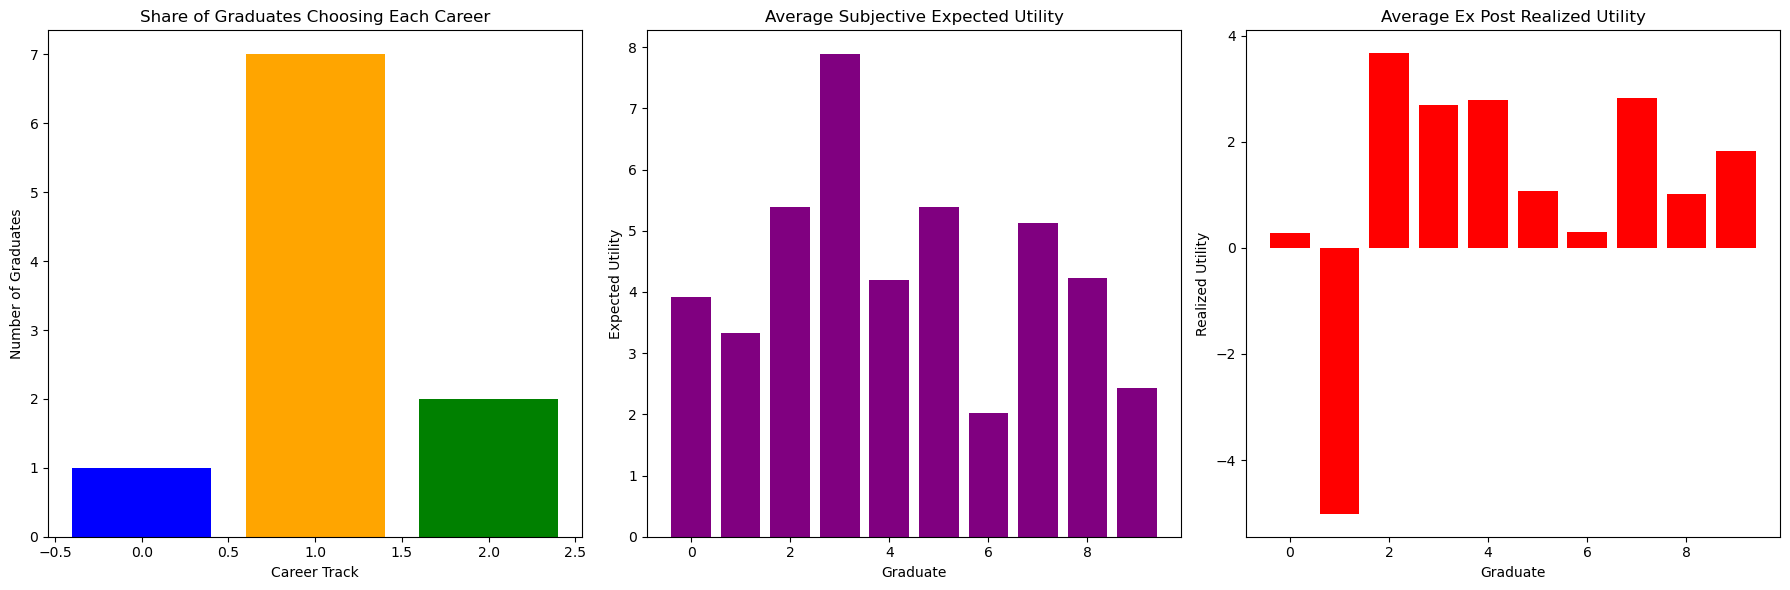

In [47]:
import matplotlib.pyplot as plt

# Function to simulate the career choices and utilities for each graduate
def simulate_career_choices(par):
    np.random.seed(0)  # For reproducibility
    career_choices = np.zeros(par.N, dtype=int)
    expected_utilities = np.zeros(par.N)
    realized_utilities = np.zeros(par.N)
    
    for i in range(par.N):
        epsilon = np.random.normal(0, par.sigma, (par.K, par.J))
        prior_expected_utility = np.zeros(par.J)    
        
        for j in range(par.J):
            friend_epsilon = np.random.normal(0, par.sigma, par.F[i])
            prior_expected_utility[j] = par.v[j] + friend_epsilon.mean()
        
        personal_epsilon = np.random.normal(0, par.sigma, par.J)
        total_expected_utility = prior_expected_utility + personal_epsilon
        career_choice = np.argmax(total_expected_utility)
        
        career_choices[i] = career_choice
        expected_utilities[i] = total_expected_utility[career_choice]
        realized_utilities[i] = par.v[career_choice] + np.random.normal(0, par.sigma)
    
    return career_choices, expected_utilities, realized_utilities

career_choices, avg_expected_utilities, avg_realized_utilities = simulate_career_choices(par)

# Visualize the results
def visualize_results(par, career_choices, avg_expected_utilities, avg_realized_utilities):
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    
    # Share of graduates choosing each career
    career_counts = np.bincount(career_choices, minlength=par.J)
    ax[0].bar(range(par.J), career_counts, color=['blue', 'orange', 'green'])
    ax[0].set_title("Share of Graduates Choosing Each Career")
    ax[0].set_xlabel("Career Track")
    ax[0].set_ylabel("Number of Graduates")
    
    # Average expected utility
    ax[1].bar(range(par.N), avg_expected_utilities, color='purple')
    ax[1].set_title("Average Subjective Expected Utility")
    ax[1].set_xlabel("Graduate")
    ax[1].set_ylabel("Expected Utility")
    
    # Average realized utility
    ax[2].bar(range(par.N), avg_realized_utilities, color='red')
    ax[2].set_title("Average Ex Post Realized Utility")
    ax[2].set_xlabel("Graduate")
    ax[2].set_ylabel("Realized Utility")
    
    plt.tight_layout()
    plt.show()

visualize_results(par, career_choices, avg_expected_utilities, avg_realized_utilities)


After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

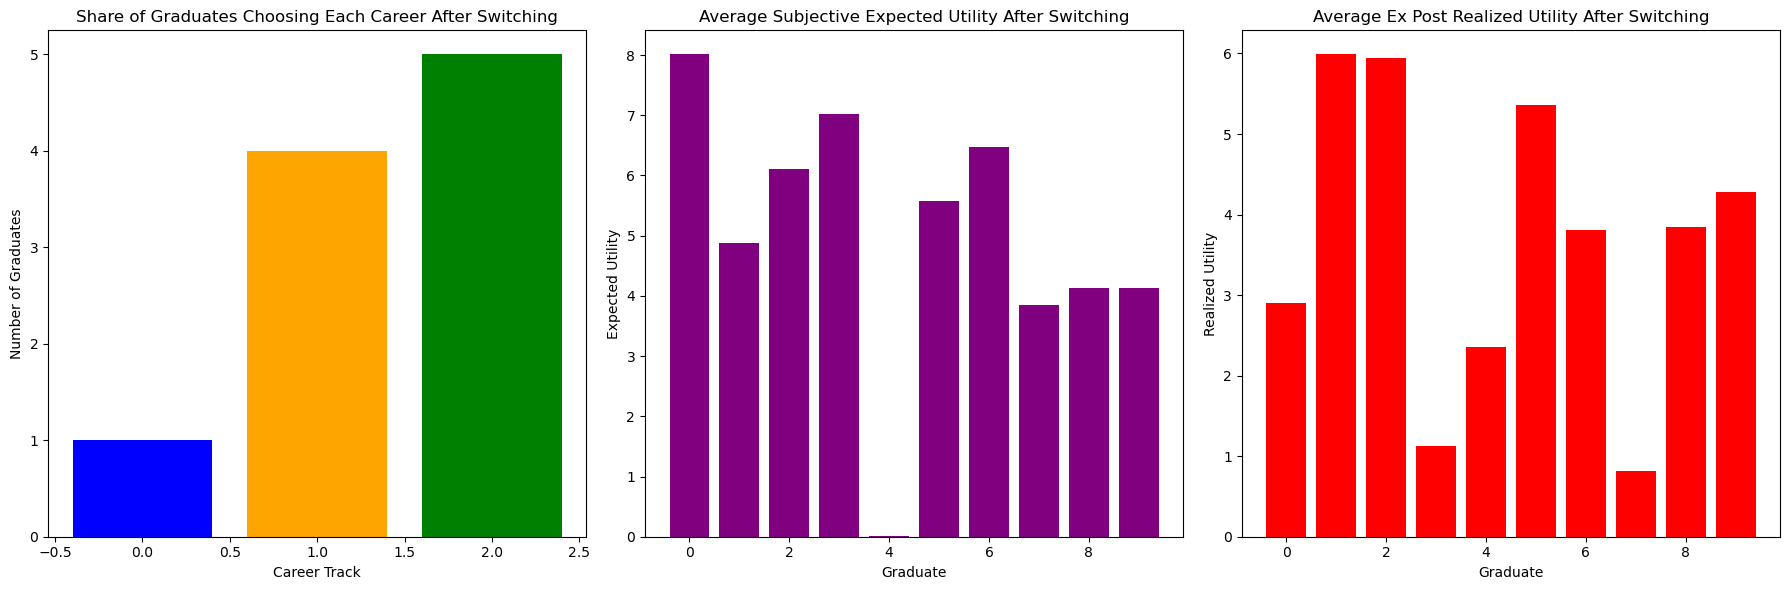

Share of graduates that chose to switch careers: 0.4


In [48]:
# Function to simulate the new optimal career choices and utilities after a year
def simulate_new_career_choices(par, career_choices, avg_realized_utilities):
    np.random.seed(0)  # For reproducibility
    new_career_choices = np.zeros(par.N, dtype=int)
    new_expected_utilities = np.zeros(par.N)
    new_realized_utilities = np.zeros(par.N)
    switch_decisions = np.zeros(par.N, dtype=bool)
    
    for i in range(par.N):
        current_career = career_choices[i]
        current_utility = avg_realized_utilities[i]
        
        new_prior_expected_utility = np.zeros(par.J)
        for j in range(par.J):
            friend_epsilon = np.random.normal(0, par.sigma, par.F[i])
            new_prior_expected_utility[j] = par.v[j] + friend_epsilon.mean()
        
        personal_epsilon = np.random.normal(0, par.sigma, par.J)
        total_new_expected_utility = new_prior_expected_utility + personal_epsilon
        
        best_new_career = np.argmax(total_new_expected_utility)
        if best_new_career != current_career:
            total_new_expected_utility[best_new_career] -= par.c
        
        new_career_choice = np.argmax(total_new_expected_utility)
        new_career_choices[i] = new_career_choice
        new_expected_utilities[i] = total_new_expected_utility[new_career_choice]
        new_realized_utilities[i] = par.v[new_career_choice] + np.random.normal(0, par.sigma)
        switch_decisions[i] = new_career_choice != current_career
    
    return new_career_choices, new_expected_utilities, new_realized_utilities, switch_decisions

new_career_choices, new_avg_expected_utilities, new_avg_realized_utilities, switch_decisions = simulate_new_career_choices(par, career_choices, avg_realized_utilities)

# Visualize the new results
def visualize_new_results(par, new_career_choices, new_avg_expected_utilities, new_avg_realized_utilities, switch_decisions):
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    
    # Share of graduates choosing each career after switching
    new_career_counts = np.bincount(new_career_choices, minlength=par.J)
    ax[0].bar(range(par.J), new_career_counts, color=['blue', 'orange', 'green'])
    ax[0].set_title("Share of Graduates Choosing Each Career After Switching")
    ax[0].set_xlabel("Career Track")
    ax[0].set_ylabel("Number of Graduates")
    
    # Average expected utility after switching
    ax[1].bar(range(par.N), new_avg_expected_utilities, color='purple')
    ax[1].set_title("Average Subjective Expected Utility After Switching")
    ax[1].set_xlabel("Graduate")
    ax[1].set_ylabel("Expected Utility")
    
    # Average realized utility after switching
    ax[2].bar(range(par.N), new_avg_realized_utilities, color='red')
    ax[2].set_title("Average Ex Post Realized Utility After Switching")
    ax[2].set_xlabel("Graduate")
    ax[2].set_ylabel("Realized Utility")
    
    plt.tight_layout()
    plt.show()

visualize_new_results(par, new_career_choices, new_avg_expected_utilities, new_avg_realized_utilities, switch_decisions)

# Print the share of graduates that chose to switch careers
print("Share of graduates that chose to switch careers:", np.mean(switch_decisions))


## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [49]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

In [50]:
# write your answer here

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [51]:
# write your answer here

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [52]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [53]:
# write your answer here

**Question 4:** Repeat question 3 for all points in the set $Y$.

In [54]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [55]:
# write your answer here